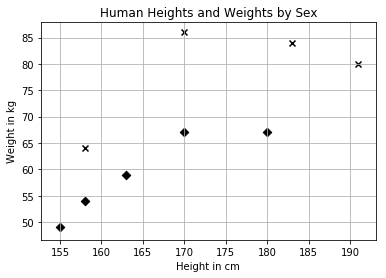

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67]
])
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']

plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, x in enumerate(X_train):
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')
plt.grid(True)
plt.show()

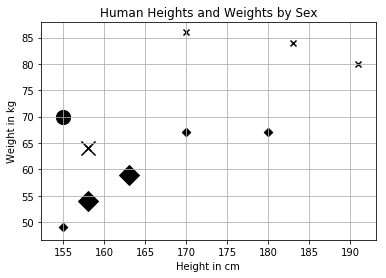

In [2]:
# plot for fig2
import numpy as np
import matplotlib.pyplot as plt

X_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67]
])
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']

plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, x in enumerate(X_train):
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')
plt.scatter(158, 64, s=200, c='k', marker='x')
plt.scatter(163, 59, s=200, c='k', marker='D')
plt.scatter(158, 54, s=200, c='k', marker='D')
plt.scatter(155, 70, s=200, c='k', marker='o')
plt.grid(True)
plt.show()

In [2]:
x = np.array([[155, 70]])

distances = np.sqrt(np.sum((X_train - x)**2, axis=1))
distances

array([  6.70820393,  21.9317122 ,  31.30495168,  37.36308338,
        21.        ,  13.60147051,  25.17935662,  16.2788206 ,  15.29705854])

In [3]:
nearest_neighbor_indices = distances.argsort()[:3]
nearest_neighbor_genders = np.take(y_train, nearest_neighbor_indices)
nearest_neighbor_genders

array(['male', 'female', 'female'], 
      dtype='|S6')

In [5]:
from collections import Counter
b = Counter(np.take(y_train, distances.argsort()[:3]))
b.most_common(1)[0][0]

'female'

In [7]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)
y_train_binarized

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [8]:
K = 3
clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train, y_train_binarized.reshape(-1))
prediction_binarized = clf.predict(np.array([155, 70]).reshape(1, -1))[0]
predicted_label = lb.inverse_transform(prediction_binarized)
predicted_label

array(['female'], 
      dtype='|S6')

In [9]:
X_test = np.array([
    [168, 65],
    [180, 96],
    [160, 52],
    [169, 67]
])
y_test = ['male', 'male', 'female', 'female']
y_test_binarized = lb.transform(y_test)
print('Binarized labels: %s' % y_test_binarized.T[0])

predictions_binarized = clf.predict(X_test)
print('Binarized predictions: %s' % predictions_binarized)
print('Predicted labels: %s' % lb.inverse_transform(predictions_binarized))

Binarized labels: [1 1 0 0]
Binarized predictions: [0 1 0 0]
Predicted labels: ['female' 'male' 'female' 'female']


In [10]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_test_binarized, predictions_binarized))

Accuracy: 0.75


In [11]:
from sklearn.metrics import precision_score
print('Precision: %s' % precision_score(y_test_binarized, predictions_binarized))

Precision: 1.0


In [12]:
from sklearn.metrics import recall_score
print('Recall: %s' % recall_score(y_test_binarized, predictions_binarized))

Recall: 0.5


In [13]:
from sklearn.metrics import f1_score
print('F1 score: %s' % f1_score(y_test_binarized, predictions_binarized))

F1 score: 0.666666666667


In [14]:
from sklearn.metrics import matthews_corrcoef
print('Matthews correlation coefficient: %s' % matthews_corrcoef(y_test_binarized, predictions_binarized))

Matthews correlation coefficient: 0.57735026919


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test_binarized, predictions_binarized, target_names=['male'], labels=[1]))

             precision    recall  f1-score   support

       male       1.00      0.50      0.67         2

avg / total       1.00      0.50      0.67         2

